# Mobile Price Prediction
Aim of the dataset is to predict the price range of Mobile ith the help of Features

To download the dataset click on the link given below

https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

# Import Train Dataset

In [3]:
train_data = pd.read_csv('train.csv')
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


# Description  
1. battery_power = Total energy a battery can store in one time measured in mAh
2. blue = Has bluetooth or not
3. clock_speed = speed at which microprocessor executes instructions
4. dual_sim = Has dual sim support or not
5. fc = Front Camera mega pixels
6. four_g = Has 4G or not
7. int_memory = Internal Memory in Gigabytes
8. m_dep = Mobile Depth in cm
9. mobile_wt =  Weight of mobile phone
10. n_cores =  Number of cores of processor
11. pc = Primary Camera mega pixels
12. px_height = Pixel Resolution Height
13. px_width = Pixel Resolution Width
14. ram = Random Access Memory in Mega Bytes
15. sc_h = Screen Height of mobile in cm
16. sc_w = Screen Width of mobile in cm
17. talk_time = longest time that a single battery charge will last when you are
18. three_g = Has 3G or not
19. touch_screen = Has touch screen or not
20. wifi = Has wifi or no
21. price_range = This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [4]:
train_data.shape

(2000, 21)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In our dataset we can see that there are no categorical values and null value present in our dataset

In [7]:
# Lets chechk the correleation between different feature
# Our main aim is to predict the Mobile price so lets see which all features are correlated to  Price feature
train_data.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


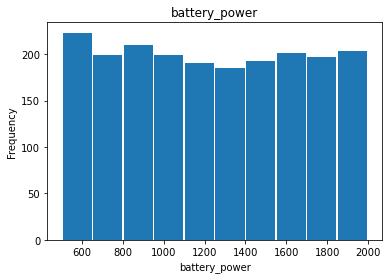

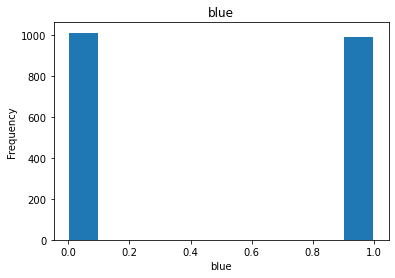

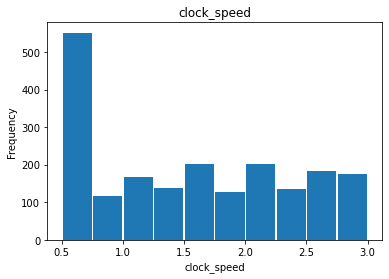

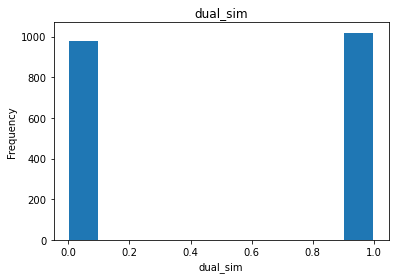

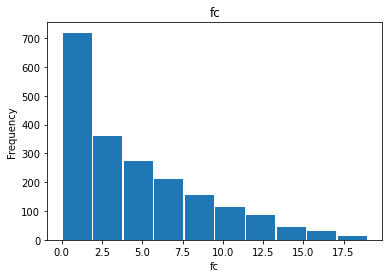

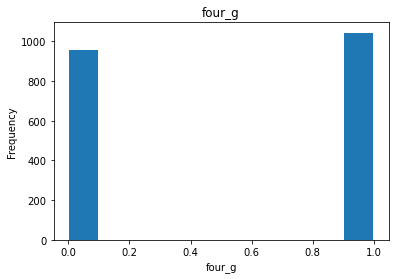

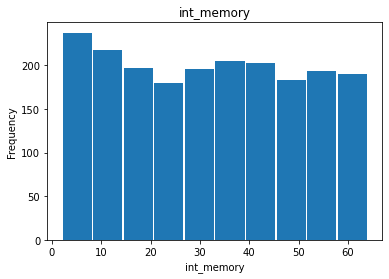

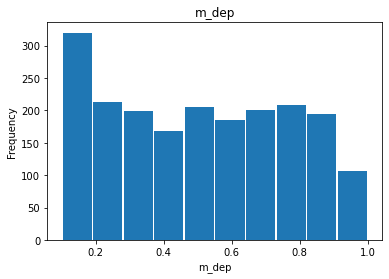

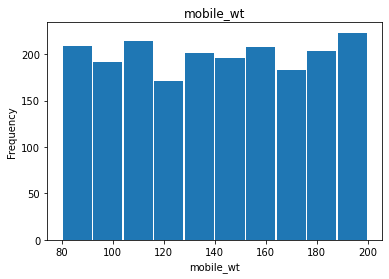

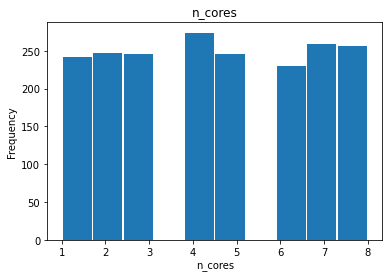

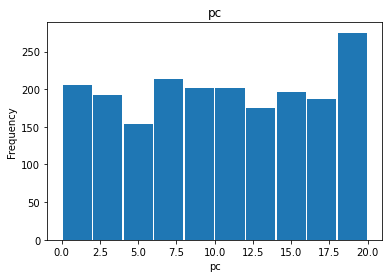

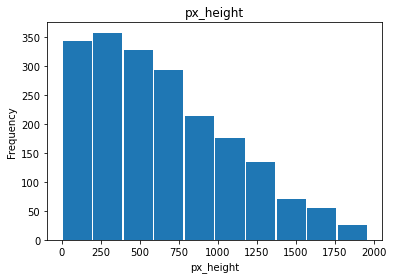

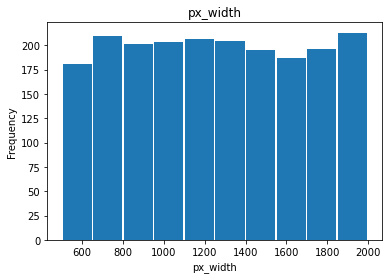

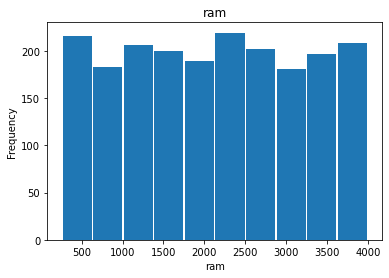

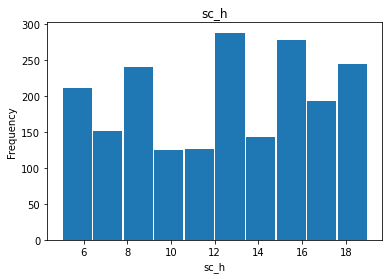

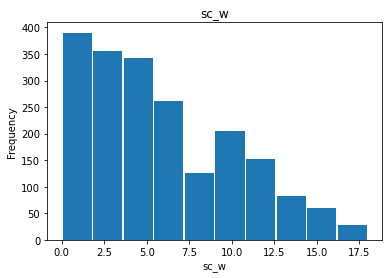

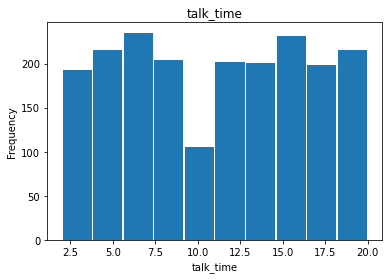

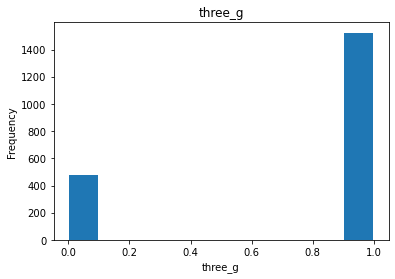

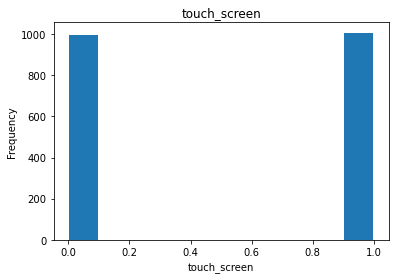

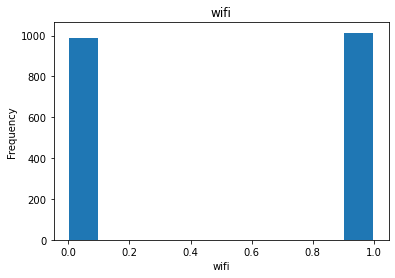

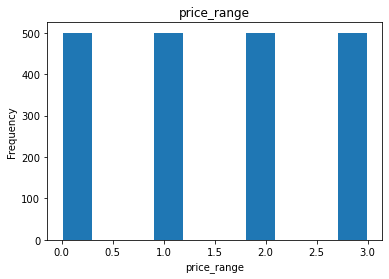

In [8]:
for value in train_data.columns:
    plt.hist(train_data[value],rwidth = 0.95)
    plt.xlabel(value)
    plt.ylabel('Frequency')
    plt.title(value)
    plt.show()

In [9]:
# for value in train_data.columns:
#     data = train_data.copy()
#     if value == 'price_range':
#         pass
#     else:
#         data[value] = np.log(data[value])
#         plt.scatter(data[value],data['price_range'])
#         plt.xlabel(value)
#         plt.ylabel('Price')
#         plt.title(value)
#         plt.show()

In [10]:
train_data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

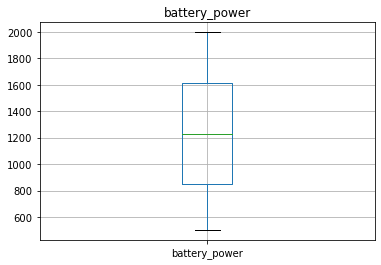

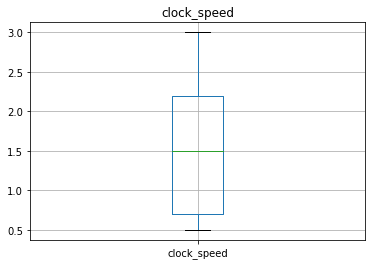

C:\Users\vaibh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


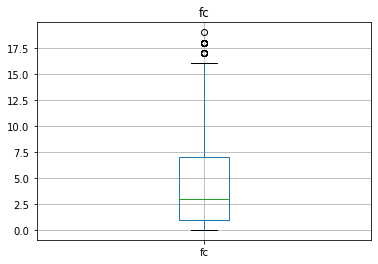

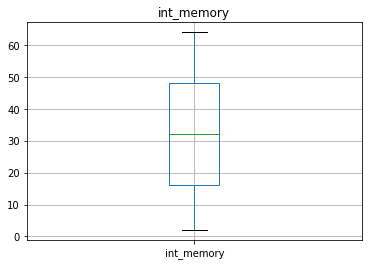

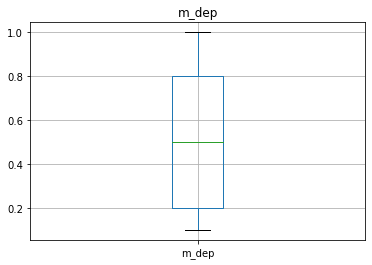

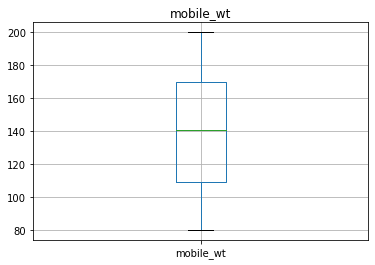

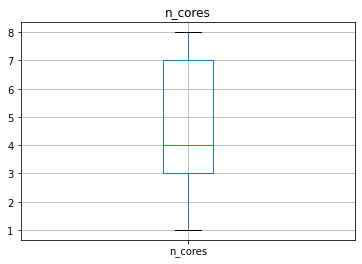

C:\Users\vaibh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


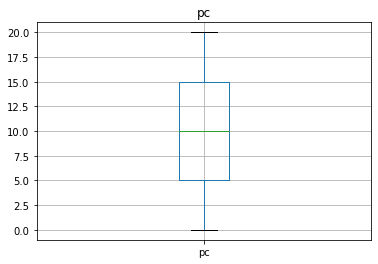

C:\Users\vaibh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


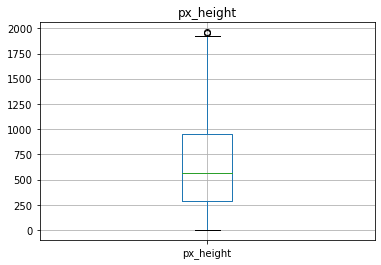

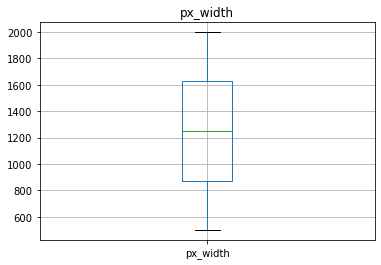

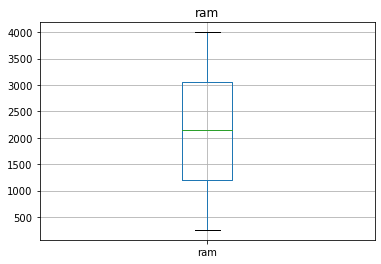

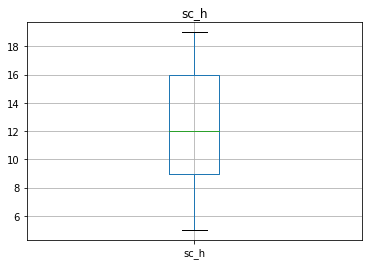

C:\Users\vaibh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


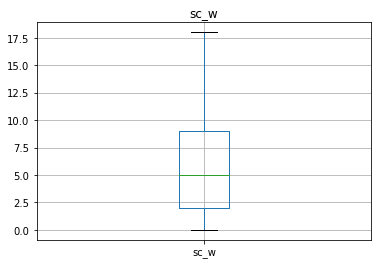

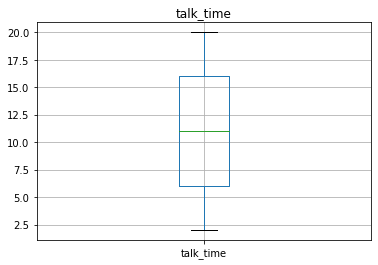

C:\Users\vaibh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


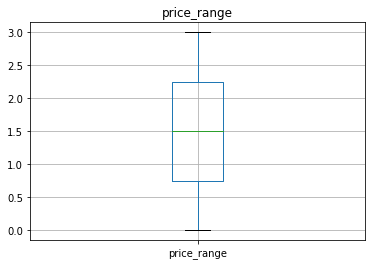

In [11]:
for value in train_data.columns:
    data = train_data.copy()
    if data[value].nunique()<3:
        pass
    else:        
        data = train_data.copy()
        data[value] - np.log(data[value])
        data.boxplot(column = value)
        plt.title(value)
        plt.show()

In [12]:
# As we can see that there are No ouliers in data

In [13]:
X = train_data.drop('price_range',axis=1)

In [14]:
Y = train_data['price_range']

In [15]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [16]:
important_feature = SelectFromModel(Lasso(alpha = 0.005))
important_feature.fit(X,Y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [17]:
important_feature.get_support()

array([ True, False,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False,  True])

In [18]:
selected_feature = X.columns[important_feature.get_support()]

In [19]:
selected_feature

Index(['battery_power', 'clock_speed', 'dual_sim', 'fc', 'int_memory',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'talk_time', 'wifi'],
      dtype='object')

In [20]:
print('Number of Selected Feature:',len(selected_feature))
print('Feature which are not selected:',len(train_data.columns)-1-len(selected_feature))
print('Total feature:',len(train_data.columns)-1)

Number of Selected Feature: 14
Feature which are not selected: 6
Total feature: 20


In [21]:
x = X[selected_feature].values

In [22]:
y = Y.values

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size =0.3,random_state=0)

In [25]:
from sklearn.metrics import confusion_matrix


# Import Algorithm


In [34]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
ypred  =lr.predict(xtest)

# Accuracy = 64%

C:\Users\vaibh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =7)
knn.fit(xtrain,ytrain)
ypred  =knn.predict(xtest)

# Accuracy = 94.3%
# n_neighbors = 18 -->Accuracy = 94.6%

In [26]:
# SVC
from sklearn.svm import SVC
svc = SVC(kernel = 'linear',random_state=0)  #Kernals = 'poly','rbf','sigmoid','linear'
svc.fit(xtrain,ytrain)
ypred  =svc.predict(xtest)

# Accuracy = 96.8%

In [36]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt =DecisionTreeClassifier(criterion = 'entropy')
dt.fit(xtrain,ytrain)
ypred  =dt.predict(xtest)

# Accuracy = 84%

In [37]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier(n_estimators = 14,criterion = 'entropy')
rf.fit(xtrain,ytrain)
ypred  =rf.predict(xtest)

# Accuracy = 87%

In [27]:
cm =confusion_matrix(ytest,ypred)

<AxesSubplot:>

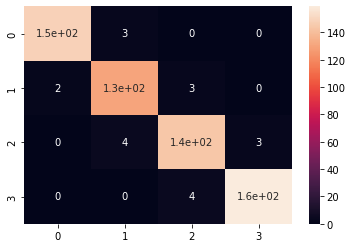

In [28]:
sns.heatmap(cm,annot=True)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
score = accuracy_score(ytest,ypred)*100
score

96.83333333333334

In [38]:
  # Random Forest
x = X[selected_feature].values
y = Y.values
l1=[]
for i in range(1,20):
    
    rf = RandomForestClassifier(n_estimators= i,criterion='entropy')
    rf.fit(xtrain,ytrain)
    ypred = rf.predict(xtest)
    score = accuracy_score(ytest,ypred)
    l1.append([i,score])
    
l1
    

[[1, 0.67],
 [2, 0.5883333333333334],
 [3, 0.6816666666666666],
 [4, 0.7333333333333333],
 [5, 0.7516666666666667],
 [6, 0.8016666666666666],
 [7, 0.8083333333333333],
 [8, 0.8083333333333333],
 [9, 0.82],
 [10, 0.8233333333333334],
 [11, 0.8366666666666667],
 [12, 0.8383333333333334],
 [13, 0.8416666666666667],
 [14, 0.845],
 [15, 0.85],
 [16, 0.8483333333333334],
 [17, 0.875],
 [18, 0.8433333333333334],
 [19, 0.8466666666666667]]

In [39]:
# KNN
l2 =[]
x = X[selected_feature].values
y = Y.values
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(xtrain,ytrain)
    ypred = knn.predict(xtest)
    score = accuracy_score(ytest,ypred)
    l2.append([i,score])
l2

[[1, 0.8933333333333333],
 [2, 0.89],
 [3, 0.91],
 [4, 0.9066666666666666],
 [5, 0.925],
 [6, 0.9333333333333333],
 [7, 0.9433333333333334],
 [8, 0.9366666666666666],
 [9, 0.94],
 [10, 0.935],
 [11, 0.9383333333333334],
 [12, 0.94],
 [13, 0.9383333333333334],
 [14, 0.9416666666666667],
 [15, 0.9416666666666667],
 [16, 0.9416666666666667],
 [17, 0.9366666666666666],
 [18, 0.9466666666666667],
 [19, 0.9433333333333334]]

In [31]:
# Create Pickle File
import pickle

In [32]:
filename = 'mobile_price_pred.pickle'
pickle.dump(svc,open(filename,'wb'))

In [33]:
selected_feature

Index(['battery_power', 'clock_speed', 'dual_sim', 'fc', 'int_memory',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'talk_time', 'wifi'],
      dtype='object')

In [35]:
temp ={}
temp['battery_power'] =344
temp['clock_speed'] =3
temp['dual_sim'] =1
temp['fc'] =3
temp['int_memory'] =4
temp['mobile_wt'] = 4
temp['n_cores']=2
temp['pc'] =1
temp['px_height'] =1
temp['px_weidth']  =3
temp['ram'] =2
temp['sc_h'] =3 
temp['talk_time'] =4
temp['wifi'] = 1


In [36]:
testdata = pd.DataFrame({'x':temp}).transpose()

In [37]:
testdata

,battery_power,clock_speed,dual_sim,fc,int_memory,mobile_wt,n_cores,pc,px_height,px_weidth,ram,sc_h,talk_time,wifi
x,344,3,1,3,4,4,2,1,1,3,2,3,4,1


In [41]:
svc.predict(testdata)[0]

0